In [1]:
import sqlite3
import pandas as pd

In [2]:
db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('select * from genre', db)
# df

##### Print no of movies by genre

In [4]:
c = db.cursor()
c.execute('select genre, count(*) from genre group by genre')
ans = c.fetchall()

In [8]:
for t in ans:
    if t[0]!='':
        print(t[0],t[1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


##### Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [163]:
df = pd.read_sql_query('select a.Movie_id,Title,Rating,Domestic,Worldwide from earning a inner join imdb b where a.Movie_id = b.Movie_id',db)
df['Total'] = df.Domestic + df.Worldwide
print(list(df[df.Total == df.Total.max()]['Rating'])[0])

8.1


In [152]:
df = pd.read_sql_query('select * from earning',db)
df['total'] = df['Domestic'] + df['Worldwide']

ID = df[df.total == df.total.max()]['Movie_id']
ID = list(ID)[0]
ID

c.execute('select rating from imdb where Movie_id = ?',(ID, ))
c.fetchall()[0][0]

8.1

##### Find the most voted movie in IMDB Movie Database. Print the movie name and the rating of that movie.

In [71]:
df = pd.read_sql_query('select * from imdb',db)
row = df[df['TotalVotes'] == df['TotalVotes'].max()]
ID = list(row['Movie_id'])[0]
rating = list(row['Rating'])[0]
name = list(row['Title'])[0]
print(ID,name,rating)


46824 Inception (2010) 8.8


Q. Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.
Note: Don't print 'min' in running time.

In [118]:
df = pd.read_sql_query('select * from imdb',db)
# df['length']=0
max_length = 0
for _,row in df[df['Runtime'].notnull()].iterrows():
#     print(row['Movie_id'])
    x = row['Runtime'].split()
    if len(x)!=0:
        length = int(x[0])
        if length > max_length:
            max_length = length
            name = row['Title']
#             ID = row['Movie_id']

print(name,max_length)

The Wolf of Wall Street (2013) 180


#####  Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [8]:
df = pd.read_sql_query('select a.Movie_id,Domestic,Worldwide,budget from IMDB as a inner join earning as b where a.Movie_id = b.Movie_id', db)
df[['Budget']] = df[['Budget']].apply(pd.to_numeric)
df['NetProfit'] = df['Domestic']+df['Worldwide']-df['Budget']
ID = list(df[df['NetProfit'] == df['NetProfit'].max()]['Movie_id'])[0]
# df = pd.read_sql_query('select Title from IMDB where Movie_id = ?',(ID,))
c.execute('select Title from IMDB where Movie_id = ?',(ID, ))
print(c.fetchall()[0][0])

Star Wars: The Force Awakens (2015)


##### Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [151]:
df = pd.read_sql_query('select a.Movie_id,Title,Domestic,Worldwide,budget from IMDB as a inner join earning as b where a.Movie_id = b.Movie_id', db)
df[['Budget']] = df[['Budget']].apply(pd.to_numeric)
df['NetProfit'] = df['Domestic']+df['Worldwide']-df['Budget']
a = df[(df['Budget'] == df.Budget.min())]
# df[(df['Budget'] == df['Budget'].min()) & (df['NetProfit']==df['NetProfit'].max())]
print(list(a[a.NetProfit == a.NetProfit.max()]['Title'])[0])

Short Term 12 (2013)


##### Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [206]:
df = pd.read_sql_query('select a.Movie_id,Title,Domestic,Worldwide from imdb a inner join earning b on a.Movie_id = b.Movie_id',db)
df['Grossing'] = df.Domestic + df.Worldwide
for i in range(len(df)):
    year = df.iloc[i].Title.split('(')[-1][:-1]
    df.at[i,'Year'] = year

d = {}
for _,row in df.iterrows():
    year = int(row['Year'])
#     ID = row['Movie_id']
    name = row['Title']
    x = row['Grossing']
    t = (name,x)
    if year not in d:
        d[year] = t
    else:
        highest = d[year][-1]
        if x>highest:
            d[year] = t

years = sorted(list(d.keys()))
for year in years:
    print(year,d[year][0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


##### Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off.  
Note: 
 - Movies has multiple genres, so calculate the percentage for each genre.
 - Replace empty budget column to zero.

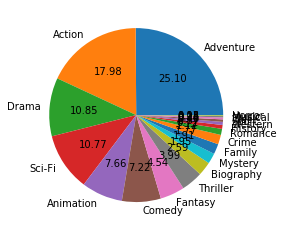

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


In [248]:
df = pd.read_sql_query('select a.Movie_id, Genre, Title, Budget from imdb a inner join genre b on a.Movie_id = b.Movie_id',db)
df[['Budget']] = df[['Budget']].apply(pd.to_numeric)
df.Budget.fillna(0,inplace = True)
# df.head()

d = {} # genre : budget
for _,row in df.iterrows():
    genre = row['genre']
    budget = row['Budget']
    d[genre] = d.get(genre,0)+budget
d.pop('',None)
d = sorted(d.items(), key=lambda x: x[1], reverse=True)
# d

import matplotlib.pyplot as plt

counts = [t[1] for t in d]
genres = [t[0] for t in d]

plt.pie(counts,labels = genres,autopct = '%.2f')
plt.show()

for i in range(len(d)):
    p = round((counts[i]/sum(counts))*100,2)
    print(genres[i],'{:.2f}'.format(p))

##### Find out the percentage of the total earning for each genre in IMDB Movie Dataset
Plot the pie chart.  
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.  
Note: Movies have multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

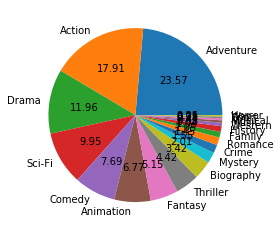

Adventure 23.57
Action 17.91
Drama 11.96
Sci-Fi 9.95
Comedy 7.69
Animation 6.77
Fantasy 5.15
Thriller 4.42
Biography 3.42
Mystery 2.01
Crime 1.55
Romance 1.45
Family 1.05
History 1.04
Western 0.65
Music 0.43
Musical 0.38
Sport 0.32
War 0.25
Horror 0.01


In [254]:
df = pd.read_sql_query(
    'select a.Movie_id, Genre, Title, Domestic, Worldwide from imdb a inner join genre b on a.Movie_id=b.Movie_id inner join earning c on a.Movie_id=c.Movie_id', db)
df['TotalEarned'] = df.Domestic + df.Worldwide
df.head()

d = {}  # genre : total_earning
for _, row in df.iterrows():
    genre = row['genre']
    total = row['TotalEarned']
    d[genre] = d.get(genre, 0)+total
d.pop('', None)
d = sorted(d.items(), key=lambda x: x[1], reverse=True)

counts = [t[1] for t in d]
genres = [t[0] for t in d]

import matplotlib.pyplot as plt

plt.pie(counts,labels = genres,autopct = '%.2f')
plt.show()

for i in range(len(d)):
    p = round((counts[i]/sum(counts))*100,2)
    print(genres[i],'{:.2f}'.format(p))

##### Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.

In [266]:
df = pd.read_sql_query('select a.Movie_id, Title, Genre, Rating from imdb a inner join genre b on a.Movie_id = b.Movie_id',db)
df = df[df['Rating']>=8]
df = df[(df['genre']=='Sci-Fi') | (df['genre']=='Mystery') ]
d = {} # name: [genres]
for _,row in df.iterrows():
    name = row['Title']
    genre = row['genre']
    if name not in d:
        d[name] = set()
    d[name].add(genre)
    
for k,v in d.items():
    if len(v)==2:
        print(k)

Arrival (2016)
